In [178]:
import talib as ta
import numpy as np
import pandas as pd
"""
# 액면분할 수정주가 반영
df = pd.read_csv('035420.csv')
df2 = df.iloc[:186]
columns = ['close', 'open', 'high', 'low', 'eps', 'bps', 'dividend_per_stock']
for column in columns:
    df2[column] = df2[column]/5.0
df3 = df.iloc[189:]
df4 = pd.concat([df2,df3],axis=0)
"""

"\n# 액면분할 수정주가 반영\ndf = pd.read_csv('035420.csv')\ndf2 = df.iloc[:186]\ncolumns = ['close', 'open', 'high', 'low', 'eps', 'bps', 'dividend_per_stock']\nfor column in columns:\n    df2[column] = df2[column]/5.0\ndf3 = df.iloc[189:]\ndf4 = pd.concat([df2,df3],axis=0)\n"

In [1]:
import talib as ta
import numpy as np
import pandas as pd

df4 = pd.read_csv('122870_label.csv')

In [180]:
df4['label'] = df4['label'].astype("category")
df4 = df4.dropna()
# 보조지표 추가
# 1) 이평선(SMA, EMA, WMA) (w = 5,10,15,20,30,60,120)
df4['ma_5'] = ta.SMA(df4.close, timeperiod=5)
df4['ma_10'] = ta.SMA(df4.close, timeperiod=10)
df4['ma_15'] = ta.SMA(df4.close, timeperiod=15)
df4['ma_20'] = ta.SMA(df4.close, timeperiod=20)
df4['ma_30'] = ta.SMA(df4.close, timeperiod=30)
df4['ma_60'] = ta.SMA(df4.close, timeperiod=60)
df4['ma_120'] = ta.SMA(df4.close, timeperiod=120)

df4['ema_5'] = ta.EMA(df4.close, timeperiod=5)
df4['ema_10'] = ta.EMA(df4.close, timeperiod=10)
df4['ema_15'] = ta.EMA(df4.close, timeperiod=15)
df4['ema_20'] = ta.EMA(df4.close, timeperiod=20)
df4['ema_30'] = ta.EMA(df4.close, timeperiod=30)
df4['ema_60'] = ta.EMA(df4.close, timeperiod=60)
df4['ema_120'] = ta.EMA(df4.close, timeperiod=120)

df4['wma_5'] = ta.WMA(df4.close, timeperiod=5)
df4['wma_10'] = ta.WMA(df4.close, timeperiod=10)
df4['wma_15'] = ta.WMA(df4.close, timeperiod=15)
df4['wma_20'] = ta.WMA(df4.close, timeperiod=20)
df4['wma_30'] = ta.WMA(df4.close, timeperiod=30)
df4['wma_60'] = ta.WMA(df4.close, timeperiod=60)
df4['wma_120'] = ta.WMA(df4.close, timeperiod=120)

df4['ma_v5'] = ta.SMA(df4.volume, timeperiod=5)
df4['ma_v10'] = ta.SMA(df4.volume, timeperiod=10)
df4['ma_v20'] = ta.SMA(df4.volume, timeperiod=20)
df4['ma_v60'] = ta.SMA(df4.volume, timeperiod=60)
df4['ma_v120'] = ta.SMA(df4.volume, timeperiod=120)

df4['ma_inst_v5'] = ta.SMA(df4.volume_inst_pure_buy, timeperiod=5)
df4['ma_inst_v10'] = ta.SMA(df4.volume_inst_pure_buy, timeperiod=10)
df4['ma_inst_v20'] = ta.SMA(df4.volume_inst_pure_buy, timeperiod=20)
df4['ma_inst_v60'] = ta.SMA(df4.volume_inst_pure_buy, timeperiod=60)
df4['ma_inst_v120'] = ta.SMA(df4.volume_inst_pure_buy, timeperiod=120)

df4['ma_fore_v5'] = ta.SMA(df4.volume_fore_pure_buy, timeperiod=5)
df4['ma_fore_v10'] = ta.SMA(df4.volume_fore_pure_buy, timeperiod=10)
df4['ma_fore_v20'] = ta.SMA(df4.volume_fore_pure_buy, timeperiod=20)
df4['ma_fore_v60'] = ta.SMA(df4.volume_fore_pure_buy, timeperiod=60)
df4['ma_fore_v120'] = ta.SMA(df4.volume_fore_pure_buy, timeperiod=120)

In [181]:
# 2) 볼린저밴드 (주가의 이동평균선을 중심으로 표준편차 범위를 표시)
ubb, mbb, lbb = ta.BBANDS(df4.close, 20, 2)
df4['ubb'] = ubb
df4['mbb'] = mbb
df4['lbb'] = lbb

In [182]:
# 3) MACD 이동평균수렴확산 (단기(EMA12)와 장기(EMA26) EMA로 모멘텀을 추정)
macd, macdsignal9, macdhist = ta.MACD(df4.close, fastperiod=12, slowperiod=26, signalperiod=9)
df4['macd'] = macd
df4['macdsignal9'] = macdsignal9
df4['macdhist'] = macdhist

In [183]:
# 4) RSI 상대강도지수 - 추세의 강도 파악, 과매수, 과매도 국면 판단
df4['rsi'] = ta.RSI(df4.close, timeperiod=14)

In [184]:
# 5) 스토캐스틱 오늘의 주가가 일정 동안 주가의 변동폭 중에서 어느 정도인 지?
slowk, slowd = ta.STOCH(df4.high, df4.low, df4.close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
fastk, fastd = ta.STOCHF(df4.high, df4.low, df4.close, fastk_period=5, fastd_period=3, fastd_matype=0)
fastk_rsi, fastd_rsi = ta.STOCHRSI(df4.close, timeperiod=14, fastk_period=5, fastd_period=3, fastd_matype=0)
df4['slowk'] = slowk
df4['slowd'] = slowd
df4['fastk'] = fastk
df4['fastd'] = fastd
df4['fastk_rsi'] = fastk_rsi
df4['fastd_rsi'] = fastd_rsi

In [185]:
# 6) 기타 자주 사용되는 것들
# CCI (Commodity Channel Index), williams'%R, parabolic SAR
# ADX (Average Directional Movement Index)
# plusDI(Plus Directional Indicator), plusDM Plus Directional Movement)
# ATR (Average True Range), OBV (On Balance Volume) 거래량 분석을 통한 주가분석, Variance
df4['cci'] = ta.CCI(df4.high, df4.low, df4.close, timeperiod=14)
df4['willR'] = ta.WILLR(df4.high, df4.low, df4.close, timeperiod=14)
df4['sar'] = ta.SAR(df4.high, df4.low, acceleration=0, maximum=0)
df4['adx'] = ta.ADX(df4.high, df4.low, df4.close, timeperiod=14)
df4['plus_di'] = ta.PLUS_DI(df4.high, df4.low, df4.close, timeperiod=14)
df4['plus_dm'] = ta.PLUS_DM(df4.high, df4.low, timeperiod=14)
df4['atr'] = ta.ATR(df4.high, df4.low, df4.close, timeperiod=14)
df4['obv'] = ta.OBV(df4.close, df4.volume)
df4['var'] = ta.VAR(df4.close, timeperiod=5, nbdev=1)

In [186]:
# 7) Pattern REcognition
# Investopedia "The 5 Most Powerful Candlestick Patterns"
# Three Line Strike, Three Black Crows
# Evening Star, Abandoned Baby
# df4['line_str'] = ta.CDL3LINESTRIKE(df4.open, df4.high, df4.low, df4.close)
# df4['blk_crw'] = ta.CDL3BLACKCROWS(df4.open, df4.high, df4.low, df4.close)
# df4['evn_star'] = ta.CDLEVENINGSTAR(df4.open, df4.high, df4.low, df4.close, penetration=0)
# df4['abn_baby'] = ta.CDLABANDONEDBABY(df4.open, df4.high, df4.low, df4.close, penetration=0)

In [187]:
df4.to_csv("ex_label.csv", mode='w', index=False)

In [188]:
def feature_scaling(df, scaling_strategy="min-max", column=None):
    if column == None:
        column = [column_name for column_name in df.columns]
    for column_name in column:
        if scaling_strategy == "min-max":
            df[column_name] = ( df[column_name] - df[column_name].min() ) /\
                            (df[column_name].max() - df[column_name].min()) 
        elif scaling_strategy == "z-score":
            df[column_name] = ( df[column_name] - \
                               df[column_name].mean() ) /\
                            (df[column_name].std() )
    return df
# scaling_col = [column for column in df4.columns]
# scaling_col.pop(0)

scaling_col = [column for column in df4.columns.difference(['date','label'])]

df_rev = df4.copy()
df_rev = df_rev.dropna()
feature_scaling(df_rev, scaling_strategy="z-score", column=scaling_col)
df_rev.to_csv("ex3_label.csv", mode='w', index=False)

In [189]:
result = [column for column in df_rev.columns]
print(result)
print(len(result))

['date', 'open', 'high', 'low', 'close', 'volume', 'value', 'stock_value', 'stock_volume', 'bps', 'pbr', 'dividend_per_stock', 'dividend_yield_ratio', 'volume_inst_buy', 'volume_inst_sell', 'volume_inst_pure_buy', 'volume_fore_buy', 'volume_fore_sell', 'volume_fore_pure_buy', 'value_inst_buy', 'value_inst_sell', 'value_inst_pure_buy', 'value_fore_buy', 'value_fore_sell', 'value_fore_pure_buy', 'kosdaq_close', 'kosdaq_open', 'kosdaq_high', 'kosdaq_low', 'kosdaq_volume', 'kosdaq_value', 'kosdaq_stock_value', 'kosdaq150_close', 'kosdaq150_open', 'kosdaq150_high', 'kosdaq150_low', 'kosdaq150_volume', 'kosdaq150_value', 'kosdaq150_stock_value', 'kosdaq150_comm_close', 'kosdaq150_comm_open', 'kosdaq150_comm_high', 'kosdaq150_comm_low', 'kosdaq150_comm_volume', 'kosdaq150_comm_value', 'kosdaq150_comm_stock_value', 'kosdaq_large_close', 'kosdaq_large_open', 'kosdaq_large_high', 'kosdaq_large_low', 'kosdaq_large_volume', 'kosdaq_large_value', 'kosdaq_large_stock_value', 'kosdaq_enter_close', 'k

In [ ]:
# 상관계수
corr = df_rev.corr(method='pearson')

corr.to_csv("corr_label.csv", mode='w')

In [47]:
# 분류 모델
import sklearn
from sklearn.tree import DecisionTreeClassifier # 모델링
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import lightgbm as lgb

import os
import random # 시드 제어

import seaborn as sns # 시각화
import matplotlib.pyplot as plt # 시각화
import shap
import skimage

# 1) Decision Tree

# Set Random Seed
seed = 1
os.environ['PYTHONHASHSEED'] = str(seed)
np.random.seed(seed)
random.seed(seed)

# 데이터 불러오기
train_data = pd.read_csv("ex4_label.csv")
test_data = pd.read_csv("ex4_label_test.csv")



In [48]:
feature_names = [column for column in train_data.columns]

X_train = train_data[train_data.columns.difference(['label'])]
y_train = train_data['label']
X_test = test_data[test_data.columns.difference(['label'])]
y_test = test_data['label']
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

tree = DecisionTreeClassifier(criterion='entropy', splitter='best', max_depth=None, 
                              min_samples_split=2, min_samples_leaf=1, 
                              min_weight_fraction_leaf=0.0, max_features=len(feature_names)-1, 
                              random_state=seed, max_leaf_nodes=None, 
                              min_impurity_decrease=0.0, min_impurity_split=None, 
                              class_weight=None, presort='deprecated', 
                              ccp_alpha=0.0)


(432, 139) (432,) (118, 139) (118,)


cross_val_acc= 80.80338
(118,)
[2 1 2 1 1 1 1 1 1 1]
test_acc= 79.66102


[Text(0.5, 1.0, 'test')]

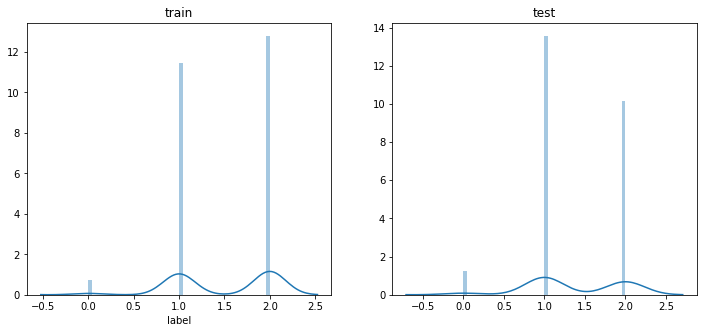

In [49]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)
score = cross_val_score(tree, X_train, y_train, cv=k_fold, scoring='accuracy')
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("cross_val_acc= {0:.5f}".format(score*100))

tree_fit = tree.fit(X_train, y_train)
predictions = tree_fit.predict(X_test)
print(predictions.shape)
print(predictions[0:10])
test_score = tree.score(X_test, y_test)
print("test_acc= {0:.5f}".format(test_score*100))


# 예측한 데이터를 시각화 해본다. 
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(predictions,ax=ax2,bins=50)
ax2.set(title="test")

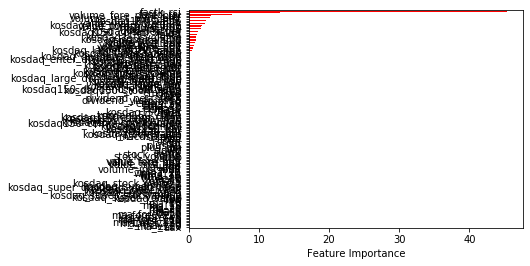

In [50]:
# 특성 중요도 검사 방법 1
Importance = pd.DataFrame({'Importance':tree.feature_importances_*100}, 
                          index = X_train.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Feature Importance')
plt.gca().legend_ = None

In [51]:
Imp = pd.DataFrame({'Importance':tree.feature_importances_*100}, 
                          index = X_train.columns)
Imp.to_csv("feature_importance.csv", mode='w')

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


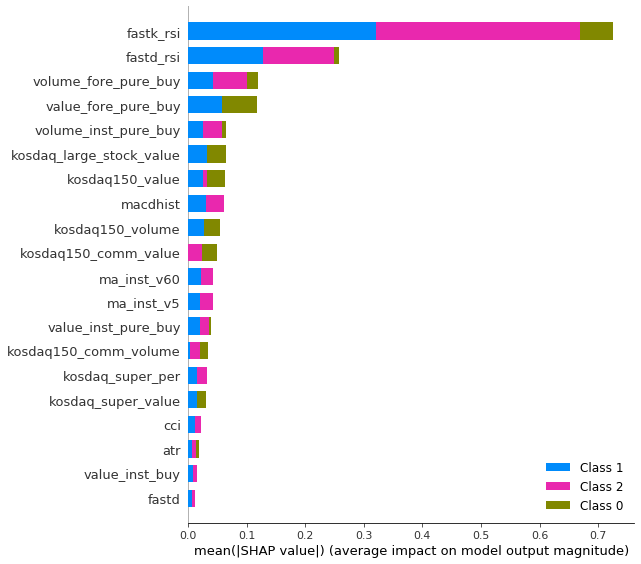

In [52]:
# 특성 중요도 검사 방법 2
explainer = shap.TreeExplainer(tree) # 트리 모델 Shap Value 계산 객체 지정
shap_values = explainer.shap_values(X_test) # Shap Values 계산
shap.summary_plot(shap_values, X_test, plot_type = "bar")

cross_val_acc= 88.19239
(118,)
[2 1 2 1 1 1 1 1 2 2]
test_acc= 88.98305


[Text(0.5, 1.0, 'test')]

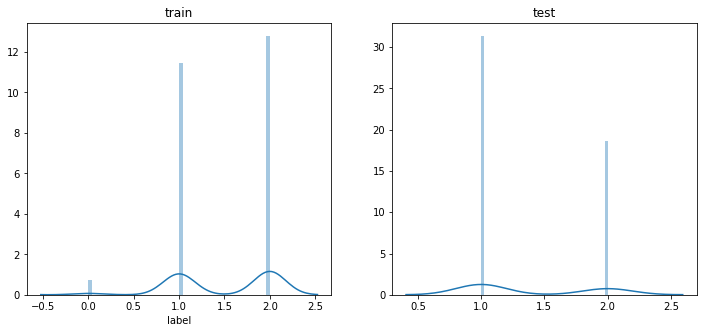

In [53]:
# 2) Random Forest

rand_tree = RandomForestClassifier(n_estimators=400, criterion='entropy', max_depth=None, 
                                  min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                  max_features=None, max_leaf_nodes=None, min_impurity_decrease=0.0, 
                                  min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=None, 
                                  random_state=seed, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)

k_fold = KFold(n_splits=10, shuffle=True, random_state=seed)
score = cross_val_score(rand_tree, X_train, y_train, cv=k_fold, scoring='accuracy')
score = score.mean()
# 0에 근접할수록 좋은 데이터
print("cross_val_acc= {0:.5f}".format(score*100))

rand_tree_fit = rand_tree.fit(X_train, y_train)
rand_predictions = rand_tree_fit.predict(X_test)
print(rand_predictions.shape)
print(rand_predictions[0:10])
test_score = accuracy_score(y_test, rand_predictions)
print("test_acc= {0:.5f}".format(test_score*100))

# 예측한 데이터를 시각화 해본다. 
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sns.distplot(y_train,ax=ax1,bins=50)
ax1.set(title="train")
sns.distplot(rand_predictions,ax=ax2,bins=50)
ax2.set(title="test")

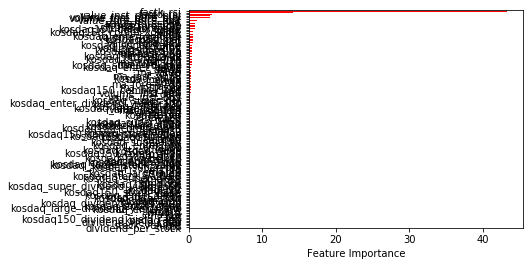

In [54]:
# 특성 중요도 검사 방법 1
Importance = pd.DataFrame({'Importance':rand_tree.feature_importances_*100}, 
                          index = X_train.columns)

Importance.sort_values(by = 'Importance', 
                       axis = 0, 
                       ascending = True).plot(kind = 'barh', 
                                              color = 'r', )

plt.xlabel('Feature Importance')
plt.gca().legend_ = None

In [55]:
Imp = pd.DataFrame({'Importance':rand_tree.feature_importances_*100}, 
                          index = X_train.columns)
Imp.to_csv("feature_importance_rand.csv", mode='w')

Setting feature_perturbation = "tree_path_dependent" because no background data was given.


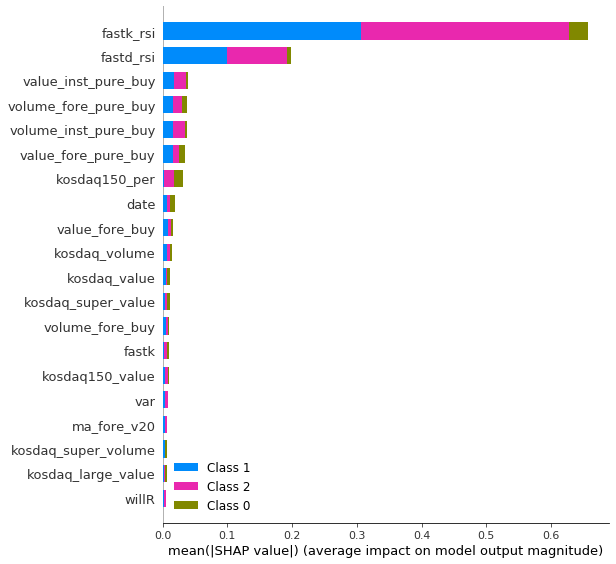

In [56]:
# 특성 중요도 검사 방법 2
explainer = shap.TreeExplainer(rand_tree) # 트리 모델 Shap Value 계산 객체 지정
shap_values = explainer.shap_values(X_test) # Shap Values 계산
shap.summary_plot(shap_values, X_test, plot_type = "bar")

In [57]:
# 3) lightGBM

# load dataset
final_ans = train_data
final_ans_test = test_data

final = pd.concat([final_ans, final_ans_test])
final = final.reset_index()
del final['index']

final = final.sort_values(by=['date'], axis=0)

X = final[final_ans.columns.difference(['close', 'label'])]
Y = final['label']

X['date'] = X['date'].astype(float)

x_train, x_valtest, y_train, y_valtest = train_test_split(X, Y, test_size = 0.2, shuffle=False, random_state=seed)
x_val, x_test, y_val, y_test = train_test_split(x_valtest, y_valtest, test_size = 0.5, shuffle=False, random_state=seed)
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape, x_test.shape, y_test.shape)

(440, 138) (440,) (55, 138) (55,) (55, 138) (55,)



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [68]:
train_lgb = lgb.Dataset(x_train, label = y_train)
val_lgb = lgb.Dataset(x_val, label = y_val)
params = {'random_seed':seed, 'bagging_seed':seed,
          'feature_fraction_seed':seed, 'data_random_seed':seed,
          'drop_seed':seed,
          'num_iterations':1000, 'num_class':3,
          'boosting_type':'gbdt', 'objective':'multiclass',
          'learning_rate':0.05, 'num_leaves':100, 'max_depth':-1,
          'bagging_fraction':0.1, 'feature_fraction':0.8,
          'lambda_l1':0.0, 'lambda_l2':15.0, 'max_bin':300}
model = lgb.train(params, train_lgb, valid_sets = val_lgb,
                  num_boost_round = 2000, # early_stopping_rounds = 100,
                  verbose_eval = 200)

lgb_test, lgb_valid = model.predict(x_test), model.predict(x_val)
lgb_valid = [np.argmax(line) for line in lgb_valid]
lgb_test = [np.argmax(line) for line in lgb_test]

# predict과 test set의 score 계산
cfmat = confusion_matrix(y_test,lgb_test)
lgb_test_score, lgb_valid_score = accuracy_score(lgb_test, y_test), accuracy_score(lgb_valid, y_val)
print(cfmat)
print('result:')
print("val_acc= {0:.5f}".format(lgb_valid_score*100))
print("test_acc= {0:.5f}".format(lgb_test_score*100))

[200]	valid_0's multi_logloss: 0.375015
[400]	valid_0's multi_logloss: 0.40062
[600]	valid_0's multi_logloss: 0.428157
[800]	valid_0's multi_logloss: 0.449244
[1000]	valid_0's multi_logloss: 0.462369
[[ 0  1  1]
 [ 0 32  3]
 [ 0  2 16]]
result:
val_acc= 89.09091
test_acc= 87.27273


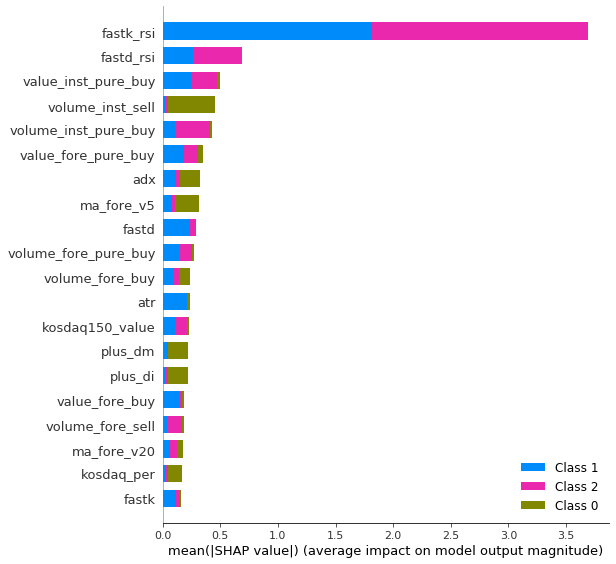

In [69]:
# 특성 중요도 검사 방법 2
explainer = shap.TreeExplainer(model) # 트리 모델 Shap Value 계산 객체 지정
shap_values = explainer.shap_values(x_test) # Shap Values 계산
shap.summary_plot(shap_values, x_test, plot_type = "bar")

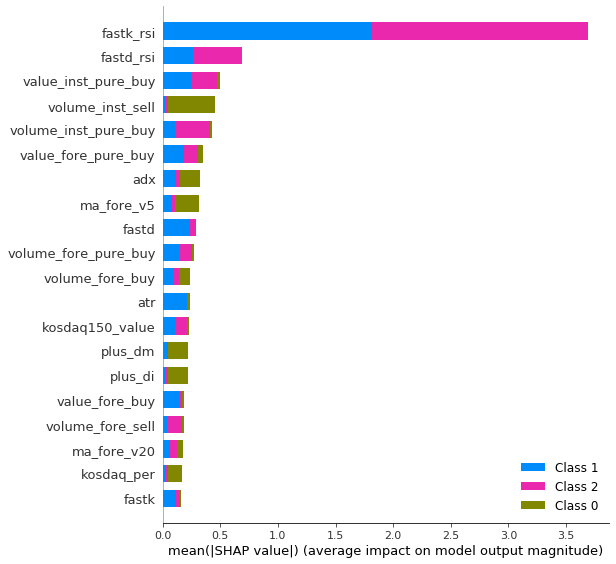

In [70]:
shap.summary_plot(shap_values, x_test)

In [80]:
Imp = pd.DataFrame({'Importance':model.feature_importance()}, 
                          index = x_train.columns)
print(Imp.head())
Imp.to_csv("feature_importance_lgbm.csv", mode='w')

      Importance
adx          429
atr          209
bps            0
cci          108
date          59
